In [1]:
from ete3 import Tree, TreeStyle, Tree, TextFace, add_face_to_node, faces
import pandas as pd

In [2]:
ts = TreeStyle()
ts.show_leaf_name = False

In [3]:
def mylayout(node):
    if not node.is_leaf():
        F = TextFace(node.name, tight_text = True)
        add_face_to_node(F, node, column=0, position='branch-right')
    if node.is_leaf():
        F = TextFace(node.org, tight_text = True)
        add_face_to_node(F, node, column=0, position='branch-right')

In [4]:
cd ~/workspace/bio/sRNA/ecoli/gloome/GLOOME_run_15167538002659/

/Users/aug/workspace/bio/sRNA/ecoli/gloome/GLOOME_run_15167538002659


In [5]:
t = Tree('Tree_with_inner_nodes_notation.ph', format=1)

In [6]:
store -r asmbly_name

In [7]:
for node in t.traverse():
    if node.name in asmbly_name:
        node.add_features(org=asmbly_name[node.name])

In [8]:
ts.layout_fn = mylayout

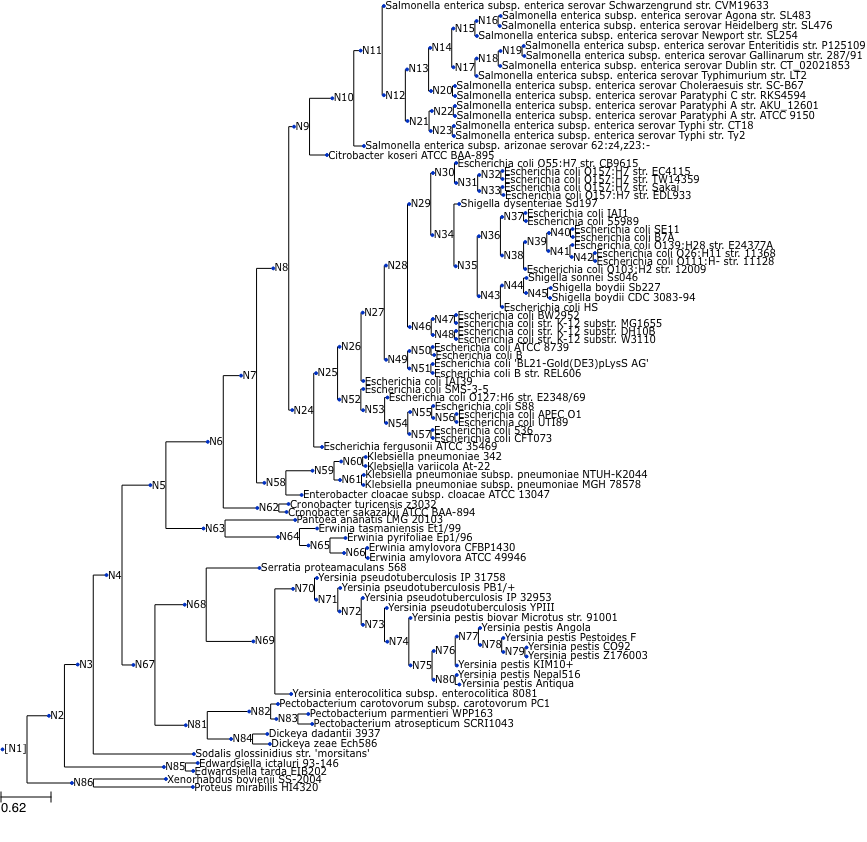

In [9]:
t.render('%%inline', tree_style=ts)

In [10]:
df = pd.read_table('Ancestral_reconstuction_of_states_per_position_per_node.txt')

In [11]:
loi = t.get_leaves_by_name('GCF_000005845.2')[0].get_ancestors()
l = [i.name for i in loi]
ndf = df[df.Node.isin(l)]

In [12]:
l

['N47',
 'N46',
 'N28',
 'N27',
 'N26',
 'N25',
 'N24',
 'N8',
 'N7',
 'N6',
 'N5',
 'N4',
 'N3',
 'N2',
 '[N1]']

In [13]:
def make_num(val):
    if val.startswith('N'):
        n = val.split('N')[1]
    elif val.startswith('['):
        n = 1
    return int(n)

In [14]:
ndf['Node'] = ndf['Node'].apply(make_num)

/Users/aug/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
gnd = dict()

In [16]:
ndf.dropna(subset=['Node'], inplace=True)

/Users/aug/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
ndf

,POS,Node,State,Prob
68,1,47,1,1.00000
72,1,46,1,1.00000
73,1,28,1,1.00000
81,1,27,1,1.00000
83,1,26,1,1.00000
97,1,25,1,0.99970
99,1,24,1,0.77720
100,1,8,1,0.52370
110,1,7,1,0.05967
114,1,6,1,0.03801


In [18]:
for pos, data in ndf.groupby('POS'):
    gn = '999' 
    for i, row in data.sort_values(by=['Node'], ascending=False).iterrows():
        if row['Prob'] >= 0.70:
            gn = row['Node']
            continue
        else:
            break
    gnd[pos] = gn

In [19]:
gnd

{1: 24.0,
 2: 7.0,
 3: 6.0,
 4: 6.0,
 5: 25.0,
 6: 6.0,
 7: 2.0,
 8: 6.0,
 9: 24.0,
 10: 3.0,
 11: 7.0,
 12: 6.0,
 13: 5.0,
 14: 7.0,
 15: 7.0,
 16: 8.0,
 17: 6.0,
 18: 8.0,
 19: 6.0,
 20: 6.0,
 21: 24.0,
 22: 8.0,
 23: 24.0,
 24: 6.0,
 25: 3.0,
 26: 3.0,
 27: 46.0,
 28: 25.0,
 29: 7.0,
 30: 24.0,
 31: 3.0,
 32: 6.0,
 33: 2.0,
 34: 6.0,
 35: 46.0,
 36: 3.0,
 37: 3.0,
 38: 24.0,
 39: 3.0,
 40: 3.0,
 41: 3.0,
 42: 27.0,
 43: 6.0,
 44: 7.0,
 45: 24.0,
 46: 6.0,
 47: 7.0,
 48: 3.0,
 49: 8.0,
 50: 6.0,
 51: 24.0,
 52: 25.0,
 53: 2.0,
 54: 7.0,
 55: 6.0,
 56: 2.0,
 57: 3.0,
 58: 3.0,
 59: 3.0,
 60: 24.0,
 61: 3.0,
 62: 7.0,
 63: 7.0,
 64: 3.0,
 65: 6.0,
 66: 3.0,
 67: 7.0,
 68: 46.0,
 69: 7.0,
 70: 6.0,
 71: 3.0,
 72: 6.0,
 73: 6.0,
 74: 6.0,
 75: 27.0,
 76: 3.0,
 77: 3.0,
 78: 24.0,
 79: 3.0,
 80: 6.0}

In [20]:
gns = pd.Series(gnd).value_counts()

In [21]:
gns

6.0     21
3.0     20
7.0     12
24.0    10
8.0      4
2.0      4
46.0     3
25.0     3
27.0     2
5.0      1
dtype: int64

In [22]:
d = {'N' + str(int(k)): v for k, v in gns.to_dict().items()}

In [23]:
d

{'N2': 4,
 'N24': 10,
 'N25': 3,
 'N27': 2,
 'N3': 20,
 'N46': 3,
 'N5': 1,
 'N6': 21,
 'N7': 12,
 'N8': 4}

In [24]:
for node in t.traverse():
    if node.name in d:
        node.add_features(gain=d[node.name])
    else:
        node.add_features(gain=0)

In [25]:
for node in t.traverse():
    print(node.gain)

0
4
0
20
0
0
0
0
0
0
0
1
0
21
0
0
0
12
0
0
0
0
0
0
0
4
0
0
0
0
0
0
0
0
0
0
0
0
10
0
0
0
0
0
0
0
0
0
0
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [26]:
def gnlayout(node):
    if not node.is_leaf():
        F = TextFace(node.name, tight_text = True)
        add_face_to_node(F, node, column=0, position='branch-right')
        node.img_style["size"] += node.gain # Increase node sphere size by gain frequency
        if node.gain > 0:
            G = TextFace(node.gain, tight_text = True, fsize=14, bold=True, fgcolor='Green')
            add_face_to_node(G, node, column=0, position='branch-top')
    if node.is_leaf():
        F = TextFace(node.org, tight_text = True)
        add_face_to_node(F, node, column=0, position='branch-right')

In [27]:
ts.layout_fn = gnlayout

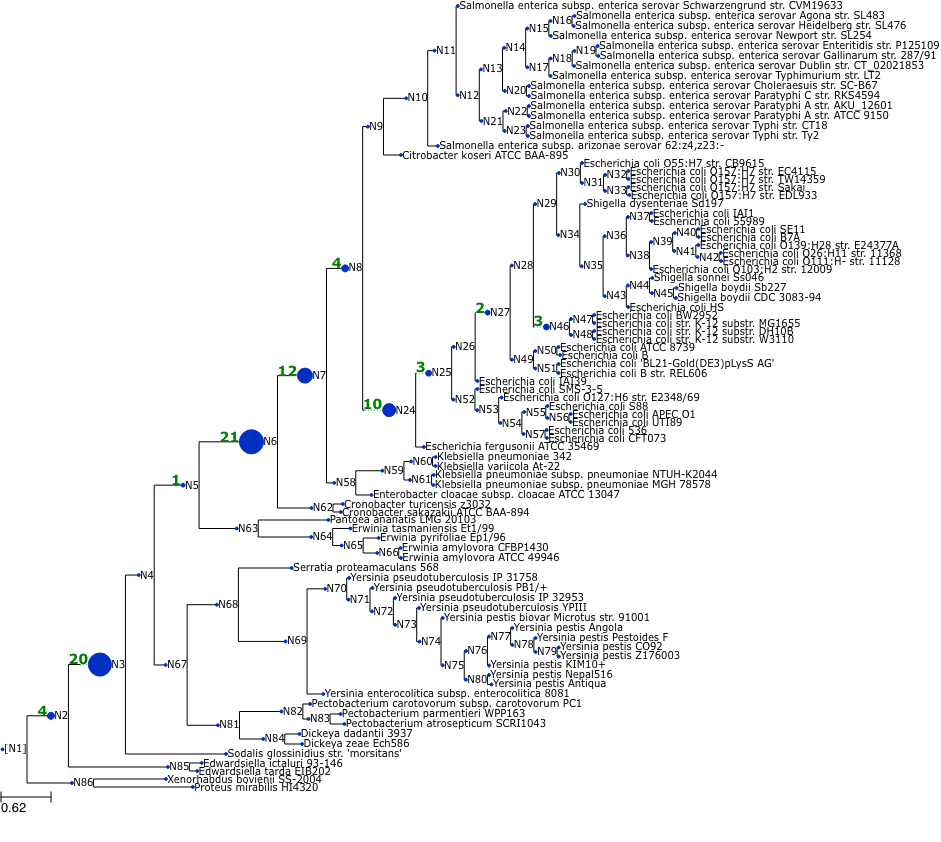

In [28]:
t.render('%%inline', tree_style=ts)

In [29]:
%store -r pa

In [30]:
s = {x:y for (x, y) in zip(range(1, 81), pa.columns.tolist())}

In [31]:
s

{1: 'C0465_rf',
 2: 'Esr1_EC',
 3: 'Esr2_EC',
 4: 'Esr4_EC',
 5: 'Esr5_EC',
 6: 'Esr6_EC',
 7: 'Esr8_EC',
 8: 'Esr9_EC',
 9: 'OrzO-P_rf',
 10: 'P26_rf',
 11: 'STnc130_rf',
 12: 'STnc180_rf',
 13: 'STnc240_rf',
 14: 'STnc3000_ST',
 15: 'STnc3160_ST',
 16: 'STnc3390_ST',
 17: 'STnc4080_ST',
 18: 'STnc410_rf',
 19: 'STnc4180_ST',
 20: 'STnc430_rf',
 21: 'STnc480_rf',
 22: 'STnc520_ST',
 23: 'STnc740_ST',
 24: 'STnc880_ST',
 25: 'Tpke11_EC_rf',
 26: 'arcZ_EC_rf',
 27: 'c0293_EC',
 28: 'c0299_EC',
 29: 'c0343_EC',
 30: 'c0719_EC',
 31: 'csrB_EC',
 32: 'csrC_EC_rf',
 33: 'cyaR_EC_rf',
 34: 'dsrA_EC',
 35: 'eyeA_EC',
 36: 'ffs_EC',
 37: 'fnrS_EC_rf',
 38: 'gadY_EC_rf',
 39: 'gcvB_EC',
 40: 'glmY_EC_rf',
 41: 'glmZ_EC_rf',
 42: 'is128_EC',
 43: 'iscRS_rf',
 44: 'isrA_EC',
 45: 'isrC_EC',
 46: 'istR_EC_rf',
 47: 'mgrR_STnc560_EC_rf',
 48: 'micA_EC_rf',
 49: 'micC_EC_rf',
 50: 'micF_EC_rf',
 51: 'ohsC_EC',
 52: 'ompn3_EC',
 53: 'omrB_EC',
 54: 'oxyS_EC',
 55: 'psrD_EC',
 56: 'psrN_EC',
 57: 'psr

In [32]:
sdf = pd.concat([pd.Series(gnd), pd.Series(s)], axis=1)

In [33]:
sdf = sdf.rename(columns={0: 'gain_node'})

In [34]:
sdf['gain_node'] = pd.to_numeric(sdf['gain_node'])

In [35]:
bins = [1, 3, 8, 999]
labels = ['old', 'teenage', 'baby']

In [36]:
sdf['age_bin'] = pd.cut(sdf['gain_node'], bins=bins, labels=labels)

In [37]:
sdf['age_bin'].value_counts()

teenage    38
old        24
baby       18
Name: age_bin, dtype: int64

In [38]:
sdf.rename(columns={1: 'name'}, inplace=True)

In [39]:
for i, d in sdf.groupby('age_bin'):
    print(i)
    print(d['name'])

old
7             Esr8_EC
10             P26_rf
25       Tpke11_EC_rf
26         arcZ_EC_rf
31            csrB_EC
33         cyaR_EC_rf
36             ffs_EC
37         fnrS_EC_rf
39            gcvB_EC
40         glmY_EC_rf
41         glmZ_EC_rf
48         micA_EC_rf
53            omrB_EC
56            psrN_EC
57    psrO_SraG_EC_rf
58            rnpB_EC
59         rprA_EC_rf
61            rybB_EC
64         ryeB_EC_rf
66         ryhB_EC_rf
71             spf_EC
76            ssrA_EC
77      ssrS_6S_EC_rf
79      tff_t44_EC_rf
Name: name, dtype: object
teenage
2                Esr1_EC
3                Esr2_EC
4                Esr4_EC
6                Esr6_EC
8                Esr9_EC
11            STnc130_rf
12            STnc180_rf
13            STnc240_rf
14           STnc3000_ST
15           STnc3160_ST
16           STnc3390_ST
17           STnc4080_ST
18            STnc410_rf
19           STnc4180_ST
20            STnc430_rf
22            STnc520_ST
24            STnc880_ST
29       

In [40]:
sdf

,gain_node,name,age_bin
1,24.0,C0465_rf,baby
2,7.0,Esr1_EC,teenage
3,6.0,Esr2_EC,teenage
4,6.0,Esr4_EC,teenage
5,25.0,Esr5_EC,baby
6,6.0,Esr6_EC,teenage
7,2.0,Esr8_EC,old
8,6.0,Esr9_EC,teenage
9,24.0,OrzO-P_rf,baby
10,3.0,P26_rf,old


In [41]:
c = pa[['rnpB_EC', 'ffs_EC', 'ssrA_EC', 'csrB_EC']]

In [42]:
c.to_csv('conserved_sRNAs_only.csv')

In [43]:
pa

,C0465_rf,Esr1_EC,Esr2_EC,Esr4_EC,Esr5_EC,Esr6_EC,Esr8_EC,Esr9_EC,OrzO-P_rf,P26_rf,...,spf_EC,sroB_EC,sroC_EC,sroE_EC,sroH_EC,ssrA_EC,ssrS_6S_EC_rf,symR_EC,tff_t44_EC_rf,tp2_ST_rf
assembly,,,,,,,,,,,,,,,,,,,,,
GCF_000020745.1,0,0,0,1,0,1,1,1,0,1,...,1,1,1,1,0,1,1,0,1,1
GCF_000020885.1,0,0,0,1,0,1,1,1,0,1,...,1,1,1,1,0,1,1,0,1,1
GCF_000020705.1,0,0,0,1,0,1,1,1,0,1,...,1,1,1,1,0,1,1,1,1,1
GCF_000016045.1,0,0,0,1,0,1,1,1,0,1,...,1,1,1,1,0,1,1,1,1,1
GCF_000009505.1,0,0,0,1,0,1,1,1,0,1,...,1,1,1,1,0,1,1,0,1,1
GCF_000009525.1,0,0,0,1,0,1,1,1,0,1,...,1,1,1,1,0,1,1,0,1,1
GCF_000020925.1,0,0,0,1,0,1,1,1,0,1,...,1,1,1,1,0,1,1,0,1,1
GCF_000006945.2,0,0,0,1,0,1,1,1,0,1,...,1,1,1,1,0,1,1,1,1,1
GCF_000008105.1,0,0,0,1,0,1,1,1,0,1,...,1,1,1,1,0,1,1,1,1,1


In [44]:
rgn = sdf.set_index('name')

In [45]:
rgn

,gain_node,age_bin
name,,
C0465_rf,24.0,baby
Esr1_EC,7.0,teenage
Esr2_EC,6.0,teenage
Esr4_EC,6.0,teenage
Esr5_EC,25.0,baby
Esr6_EC,6.0,teenage
Esr8_EC,2.0,old
Esr9_EC,6.0,teenage
OrzO-P_rf,24.0,baby


In [46]:
%store rgn

Stored 'rgn' (DataFrame)


In [47]:
t.render('rfam_gn.png', tree_style=ts)

{'faces': [[4.0, 744.3836898803711, 27.0, 754.3836898803711, 0, '[N1]'],
  [58.44819821883982,
   712.2673797607422,
   72.44819821883982,
   719.2673797607422,
   1,
   'N2'],
  [37.44819821883982,
   705.7673797607422,
   47.44819821883982,
   715.7673797607422,
   1,
   '4'],
  [135.44819821883982,
   660.5347595214844,
   149.44819821883982,
   668.5347595214844,
   2,
   'N3'],
  [72.44819821883982,
   653.5347595214844,
   92.44819821883982,
   664.5347595214844,
   2,
   '20'],
  [164.20323850964806,
   571.5695190429688,
   178.20323850964806,
   578.5695190429688,
   3,
   'N4'],
  [210.0681198434997,
   481.6571044921875,
   224.0681198434997,
   488.6571044921875,
   4,
   'N5'],
  [195.0681198434997,
   475.1571044921875,
   205.0681198434997,
   485.1571044921875,
   4,
   '1'],
  [309.4719466487959,
   437.814208984375,
   323.4719466487959,
   445.814208984375,
   5,
   'N6'],
  [244.47194664879592,
   431.814208984375,
   264.4719466487959,
   441.814208984375,
   5,
  